In [60]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns 
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans 

df = pd.read_csv("Dataset//Attrition.csv")

In [54]:
pd.factorize(df['Attrition'])

for column in df.columns: 
    if not is_numeric_dtype(df[column]): 
        item = df[column] 
        unique = list(df[column].unique()) 
        mapping = dict(zip(unique, range(0, len(unique) + 1))) 
        df[column] = item.map(mapping).astype(int)

df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,52.000000,0,0,593,0,9,4,0,2,...,3.0,3,0,20,2.0,2,8.0,7,2,13
1,1,36.000000,0,0,1218,0,1,1,1,2,...,3.0,3,1,21,3.0,3,1.0,8,1,6
2,2,35.906122,0,1,530,1,16,3,1,3,...,3.0,3,1,7,4.0,3,1.0,5,1,2
3,3,33.000000,0,0,953,0,5,4,2,2,...,3.0,2,0,12,1.0,3,3.0,7,0,7
4,4,37.252033,0,0,1380,0,9,2,1,3,...,3.0,3,0,2,2.0,3,10.0,2,2,1


In [58]:
item = df['Attrition'] 
unique = list(df['Attrition'].unique()) 
mapping = dict(zip(unique, range(0, len(unique) + 1))) 
print(item)

0       0
1       0
2       0
3       0
4       0
       ..
1171    0
1172    1
1173    0
1174    0
1175    0
Name: Attrition, Length: 1176, dtype: int32


In [16]:
#Executing kmeans on Train dataset, saving sse values on sse_values list
sse_values = list() 
max_k = 30
for k in range(2, max_k + 1): 
    kmeans = KMeans(init='k-means++', n_clusters = k, max_iter = 100)
    kmeans.fit(df._get_numeric_data())
    sse_values.append(kmeans.inertia_)

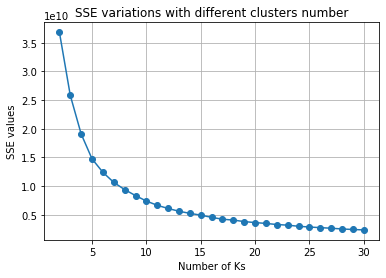

In [20]:
plt.plot(range(2, max_k + 1), sse_values, marker = "o")
plt.grid(True)
plt.title("SSE variations with different clusters number")
plt.xlabel("Number of Ks")
plt.ylabel("SSE values")
plt.show()

In [ ]:
######DBSCAN SIDE

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("./Dataset/attrition.csv")

In [5]:
attr = ['Age','YearsAtCompany','JobLevel','TotalWorkingYears','YearsInCurrentRole','Education',
         'YearsSinceLastPromotion','YearsWithCurrManager','MonthlyIncome','NumCompaniesWorked']
df=df[attr]

KeyError: "['YearsWithCurrManager', 'YearsInCurrentRole', 'YearsSinceLastPromotion'] not in index"

In [2]:
X = StandardScaler().fit_transform(df.values)

NameError: name 'df' is not defined

In [63]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3,min_samples=5,metric='cosine')
dbscan.fit(X)

NameError: name 'X' is not defined

In [64]:
np.unique(dbscan.labels_, return_counts=True)

AttributeError: 'DBSCAN' object has no attribute 'labels_'

In [65]:
attr2discard = ['Attrition','BusinessTravel','Department',]

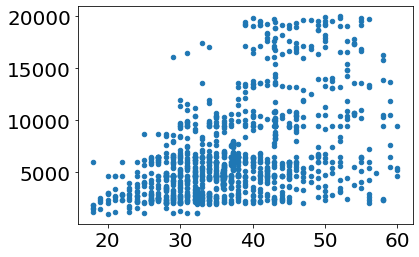

In [66]:
plt.scatter(df['Age'],df['MonthlyIncome'], s=20)
plt.tick_params(axis='both',labelsize=20)
plt.show()

In [67]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

ValueError: could not convert string to float: 'No'

In [68]:
plt.scatter(X[:,0],X[:,16], s=20)
plt.tick_params(axis='both',labelsize=20)
plt.show()

NameError: name 'X' is not defined

(array([231., 300., 301.,  65., 114.,  36.,  39.,  10.,  38.,  42.]),
 array([ 1009.,  2908.,  4807.,  6706.,  8605., 10504., 12403., 14302.,
        16201., 18100., 19999.]),
 <a list of 10 Patch objects>)

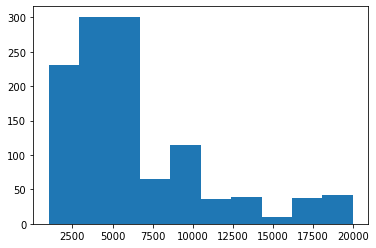

In [69]:
plt.hist(df['MonthlyIncome'])

In [70]:
plt.hist(X[:,16])

NameError: name 'X' is not defined